In [325]:
import sys
import os
from pycocotools.coco import COCO
from collections import defaultdict
import random
import json
import numpy as np

from PIL import Image
from PIL import ImageDraw

import matplotlib.pyplot as plt
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

# %matplotlib inline

In [156]:
data_root = '../../dataset/coco/'
imgs_root = os.path.join(data_root, 'images')
anns_root = os.path.join(data_root, 'annotations')
year = 'val2017'

In [157]:
coco = COCO(os.path.join(anns_root, f'instances_{year}.json'))

loading annotations into memory...
Done (t=0.70s)
creating index...
index created!


In [158]:
imgs_id = list(coco.imgs.keys())

In [159]:
img_id = imgs_id[0]
name = coco.loadImgs(img_id)[0]['file_name']

ann_ids = coco.getAnnIds(img_id)
anns = coco.loadAnns(ann_ids)
targets = [(ann['bbox'], ann['category_id']) for ann in anns]

class_name = coco.loadCats(targets[0][1])

print(img_id)
print(path)
print(ann_ids)
print(class_name)

397133
000000397133.jpg
[82445, 119568, 200887, 693231, 713388, 716434, 1125079, 1218137, 1878837, 1883614, 1902250, 1902971, 1914453, 2105658, 2114911, 2114949, 2139366, 2188144, 2196309]
[{'supercategory': 'kitchen', 'id': 44, 'name': 'bottle'}]


In [160]:
targets[0]

([217.62, 240.54, 38.99, 57.75], 44)

In [161]:
path = coco.loadImgs(img_id)[0]

In [192]:
result = defaultdict(list)
classes = set()

for img_id in list(coco.imgs.keys()):
    
    path_name = coco.loadImgs(img_id)[0]['file_name']
    
    ann_ids = coco.getAnnIds(img_id)
    anns = coco.loadAnns(ann_ids)
    bboxes = [ann['bbox'] for ann in anns]
    cls_ids = [ann['category_id'] for ann in anns]
    cls_names = coco.loadCats(cls_ids)

    for cls, bbx in zip(cls_names, bboxes):
        if cls['supercategory'] in ['vehicle', 'person', 'animal', 'outdoor']:
            result[path_name] += [(cls['name'], cls['supercategory'], bbx)]
            classes.add(cls['name'])

In [193]:
len(result)

3904

In [194]:
len(result.keys())

3904

In [195]:
print(len(classes))
print(classes)

24
{'airplane', 'cat', 'motorcycle', 'cow', 'zebra', 'person', 'elephant', 'horse', 'bird', 'stop sign', 'sheep', 'bench', 'fire hydrant', 'bus', 'bear', 'parking meter', 'truck', 'bicycle', 'boat', 'train', 'car', 'giraffe', 'dog', 'traffic light'}


In [197]:
n = random.randint(0, len(result)-1)
print(result[list(result.keys())[n]], list(result.keys())[n])
img = Image.open(os.path.join(imgs_root, 'val2017', list(result.keys())[n]))
_draw = ImageDraw.Draw(img)

for res in result[list(result.keys())[n]]:
    _draw.rectangle( (res[-1][0], res[-1][1], res[-1][0]+res[-1][2], res[-1][1]+res[-1][3] ), outline='red' )

img.show()

[('person', 'person', [107.54, 131.67, 148.6, 251.18]), ('person', 'person', [258.42, 147.49, 107.76, 106.76]), ('person', 'person', [435.93, 84.06, 100.67, 302.03]), ('person', 'person', [169.87, 83.73, 75.46, 75.71]), ('person', 'person', [118.08, 85.99, 62.09, 146.91])] 000000323263.jpg


In [191]:
coco.loadCats(coco.getCatIds())

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [221]:
print(result[path_name], path_name)
print(result[])

[('person', 'person', [365.92, 15.07, 274.08, 458.47]), ('person', 'person', [173.66, 139.15, 208.18, 335.46]), ('person', 'person', [237.45, 46.43, 99.64, 107.15]), ('person', 'person', [1.08, 71.89, 212.97, 376.22]), ('person', 'person', [508.83, 35.38, 49.41, 129.28]), ('person', 'person', [554.15, 23.64, 36.62, 63.86]), ('person', 'person', [541.45, 21.21, 75.07, 141.72]), ('person', 'person', [343.63, 53.65, 167.62, 111.74]), ('person', 'person', [160.39, 66.68, 77.99, 84.69]), ('person', 'person', [362.44, 102.44, 24.23, 27.7]), ('person', 'person', [535.82, 21.64, 30.15, 47.03])] 000000015335.jpg


In [341]:


class DataToCoco(object):
    
    def __init__(self, path='', data=''):
        
        self.raw_data = dict()
        self.class_start_id = 1
        self.image_start_id = 0
        self.annos_start_id = 0
        
        self.data = data # {'filename': [(name1, [bbx]), (name2, [bbx])]}
            
        self.raw_data['info'] = self.get_info()
        self.raw_data['licenses'] = self.get_licenses()
        self.raw_data['categories'] = self.get_categories()
        self.raw_data['images'] = self.get_images()
        self.raw_data['annotations'] = self.get_annotations()
        
        with open('./coco_data.json', 'w') as f:
            json.dump(self.raw_data, f)
            
    def get_info(self, ):
        return {}

    def get_licenses(self, ):
        return []
    
    def get_categories(self, ):
        '''get cat'''
        cats = []
        names = set()
        for v in self.data.values():
            for vv in v:
                names.add(vv[0])

        for n in names:
            cats += [self._get_one_category(n, self.class_start_id)]
            self.class_start_id += 1
        return cats
    
    def get_images(self, ):
        ''' get images '''
        images = []
        for img_path in self.data.keys():
            images += [self._get_one_image(img_path, self.image_start_id)]
            self.image_start_id += 1
        return images
    
    def get_annotations(self, ):
        ''' get annos '''
        annos = []
        for img_info in self.raw_data['images']:
            for ann_info in self.data[img_info['file_name']]:
                annos += [self._get_one_anno(img_info, ann_info, self.annos_start_id)]
                self.annos_start_id += 1
        return annos

    
    def _get_one_category(self, cat_info, idname):
        '''get one category'''
        cate = {
            'supercategory': '',
            'id': idname,
            'name': cat_info
        }
        return cate
        

    def _get_one_image(self, filename, idname):
        ''' get one image '''
        image = {
            'license': 0,
            'coco_url': '',
            'date_captured': '',
            'flickr_url': '',
            'height': 0,
            'width': 0,
            'file_name': filename,
            'id': idname
        }
        return image
    
    def _get_one_anno(self, img_info, anno_info, idname):
        ''' get one anno '''
        cate_id = None
        for cate_info in self.raw_data['categories']:
            if cate_info['name'] == anno_info[0]:
                cate_id = cate_info['id']
                break
        
        anno = {
            'segmentation': [],
            'area': 0,
            'iscrowd': 0,
            'image_id': img_info['id'],
            'bbox': anno_info[-1],
            'category_id': cate_id,
            'id': idname
        }
        return anno

In [342]:
data = DataToCoco(data=result)

In [343]:
newcoco = COCO('/home/wenyu/workspace/pytorch_workspace/augmentor/data.json')

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


In [344]:
newcoco.loadAnns([0])

[{'segmentation': None,
  'area': 0,
  'iscrowd': 0,
  'image_id': 0,
  'bbox': [388.66, 69.92, 109.41, 277.62],
  'category_id': 6,
  'id': 0}]

In [345]:
newcoco.loadAnns(list(newcoco.imgs.keys())[1])

[{'segmentation': None,
  'area': 0,
  'iscrowd': 0,
  'image_id': 0,
  'bbox': [0.0, 262.81, 62.16, 36.77],
  'category_id': 6,
  'id': 1}]

In [346]:
with open(os.path.join(anns_root, f'instances_{year}.json'), 'r') as f:

    raw_data = json.load(f)
    
    for k in raw_data:
        print(k, type(raw_data[k]), len(raw_data[k]))
        
    print(raw_data['annotations'][:1])

info <class 'dict'> 6
licenses <class 'list'> 8
images <class 'list'> 5000
annotations <class 'list'> 36781
categories <class 'list'> 80
[{'segmentation': [[510.66, 423.01, 511.72, 420.03, 510.45, 416.0, 510.34, 413.02, 510.77, 410.26, 510.77, 407.5, 510.34, 405.16, 511.51, 402.83, 511.41, 400.49, 510.24, 398.16, 509.39, 397.31, 504.61, 399.22, 502.17, 399.64, 500.89, 401.66, 500.47, 402.08, 499.09, 401.87, 495.79, 401.98, 490.59, 401.77, 488.79, 401.77, 485.39, 398.58, 483.9, 397.31, 481.56, 396.35, 478.48, 395.93, 476.68, 396.03, 475.4, 396.77, 473.92, 398.79, 473.28, 399.96, 473.49, 401.87, 474.56, 403.47, 473.07, 405.59, 473.39, 407.71, 476.68, 409.41, 479.23, 409.73, 481.56, 410.69, 480.4, 411.85, 481.35, 414.93, 479.86, 418.65, 477.32, 420.03, 476.04, 422.58, 479.02, 422.58, 480.29, 423.01, 483.79, 419.93, 486.66, 416.21, 490.06, 415.57, 492.18, 416.85, 491.65, 420.24, 492.82, 422.9, 493.56, 424.39, 496.43, 424.6, 498.02, 423.01, 498.13, 421.31, 497.07, 420.03, 497.07, 415.15, 49

In [347]:
catIds = newcoco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = newcoco.getImgIds(catIds=catIds );
# imgIds = newcoco.getImgIds(imgIds = [5])
img = newcoco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [348]:
img

{'license': 0,
 'coco_url': '',
 'date_captured': '',
 'flickr_url': '',
 'height': 0,
 'width': 0,
 'file_name': '000000088951.jpg',
 'id': 3743}

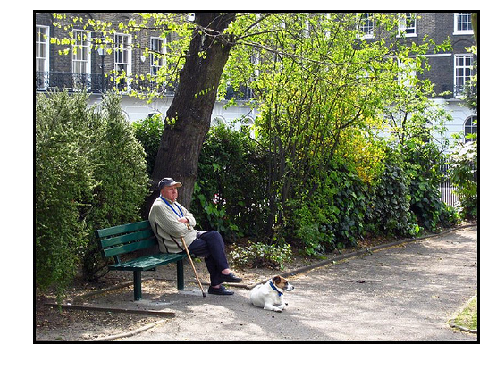

In [349]:
I = io.imread(imgs_root+'/'+year+'/'+img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

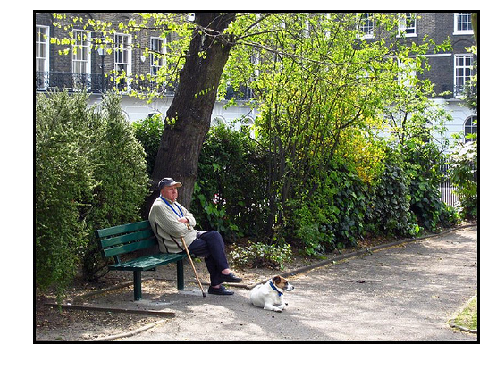

In [351]:
plt.imshow(I); plt.axis('off')
annIds = newcoco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = newcoco.loadAnns(annIds)
# newcoco.showAnns(anns)

In [354]:
img = Image.fromarray(I)
img.show()

In [355]:
anns

[{'segmentation': None,
  'area': 0,
  'iscrowd': 0,
  'image_id': 3743,
  'bbox': [243.39, 295.92, 49.14, 42.58],
  'category_id': 23,
  'id': 18280},
 {'segmentation': None,
  'area': 0,
  'iscrowd': 0,
  'image_id': 3743,
  'bbox': [128.64, 188.28, 105.85, 131.41],
  'category_id': 6,
  'id': 18281}]

In [357]:
draw = ImageDraw.Draw(img)

for ann in anns:
    bbx = ann['bbox']
    draw.rectangle((bbx[0], bbx[1], bbx[0]+bbx[2], bbx[1]+bbx[3]), outline='red')

img.show()